In [ ]:
pip install ydata-profiling --silent
pip install yellowbrick --silent

### Importing Libraries


In [92]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings

from scipy.stats import norm
from scipy.stats.mstats import trim

from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from pandas_profiling import ProfileReport

### Loading Dataset

In [16]:
df = pd.read_csv("winequality.csv")
df.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Filling missing values

In [23]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

In [24]:
fill_list = (null_cell(df)).index

df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

### Dataset Report

In [26]:
ProfileReport(df_mean, title='Wine Quality Dataset Report', minimal=True, progress_bar=False, samples=None,
              correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}},
              html={'style':{'primary_color': '#45658F'}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

### Correlation Matrix

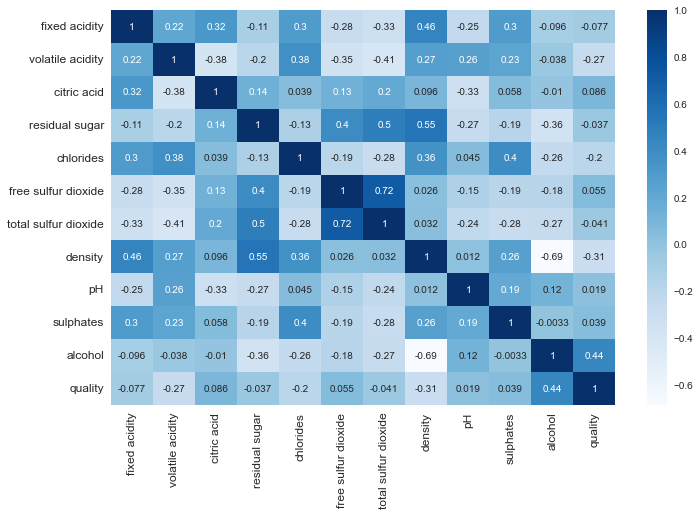

In [27]:
plt.figure(figsize=(10.5, 7.5))
sns.heatmap(df_mean.corr(), annot=True, cmap='Blues')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

- <b>Wine Quality</b> has the <b>highest correlation</b> with <b>Alcohol</b>. <br>
- Whereas it has very low relation degrees with other factors. <br> 
- It also has a low <b>negative correlation</b> with <b>Density, Volatile Acidity, Chlorides, total_sulfur_oxide and residual sugar</b> <br>


### Variable Distribution

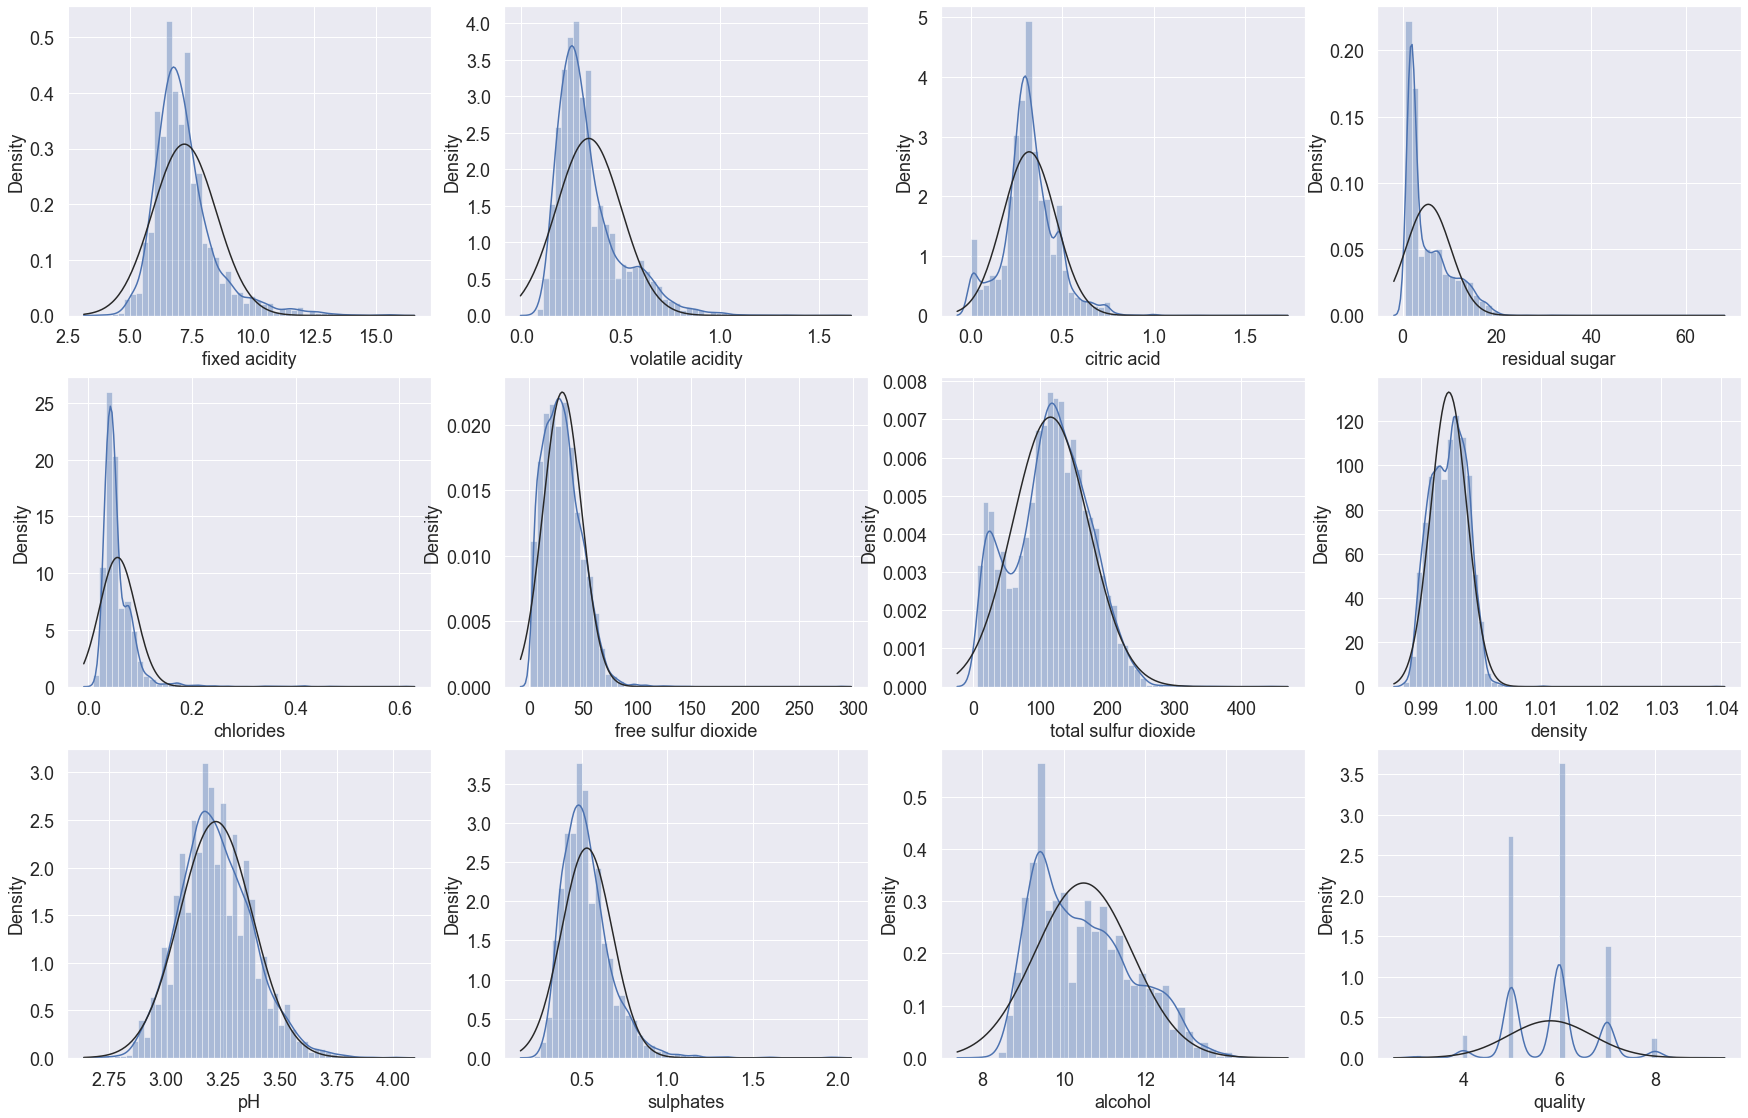

In [45]:
plt.figure(figsize =(30,33))
sns.set(font_scale=1.5)
for i in range(1,13):
    plt.subplot(5,4,i)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)

### Dataset Binning

In [49]:
df_mean['quality_class'] = ['low' if x <= 5 else 'high' for x in df['quality']]

### Wine Type and their Qualities

<AxesSubplot: xlabel='type', ylabel='count'>

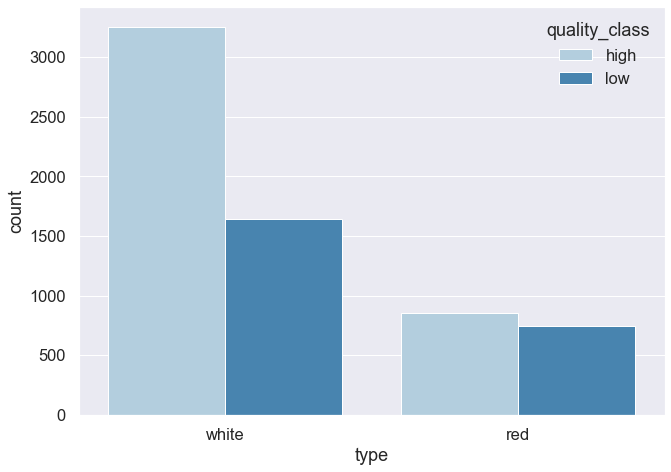

In [53]:
plt.figure(figsize=(10.5,7.5))
sns.countplot(x='type',hue='quality_class', data = df, palette="Blues")

- Quality gap in White Wine is much vast in comparison to Red Wines<br>

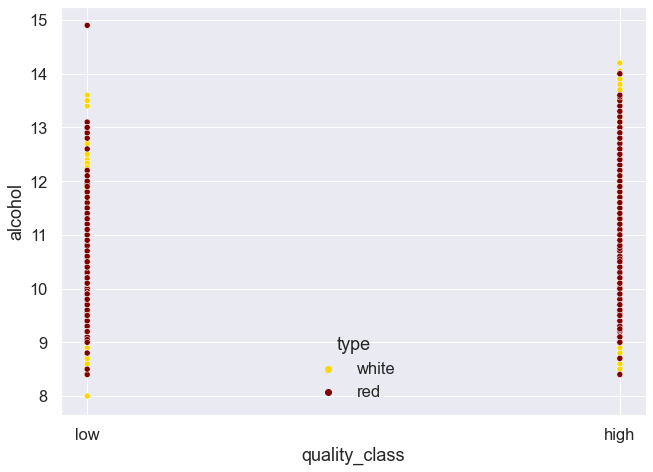

In [67]:
plt.figure(figsize=(10.5,7.5))
sns.scatterplot(x="quality_class",y='alcohol', data=df_mean, hue="type", palette = ['gold','maroon'])
plt.gca().invert_xaxis()
plt.show()

### Outlier Overview

In [72]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  quality_class         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


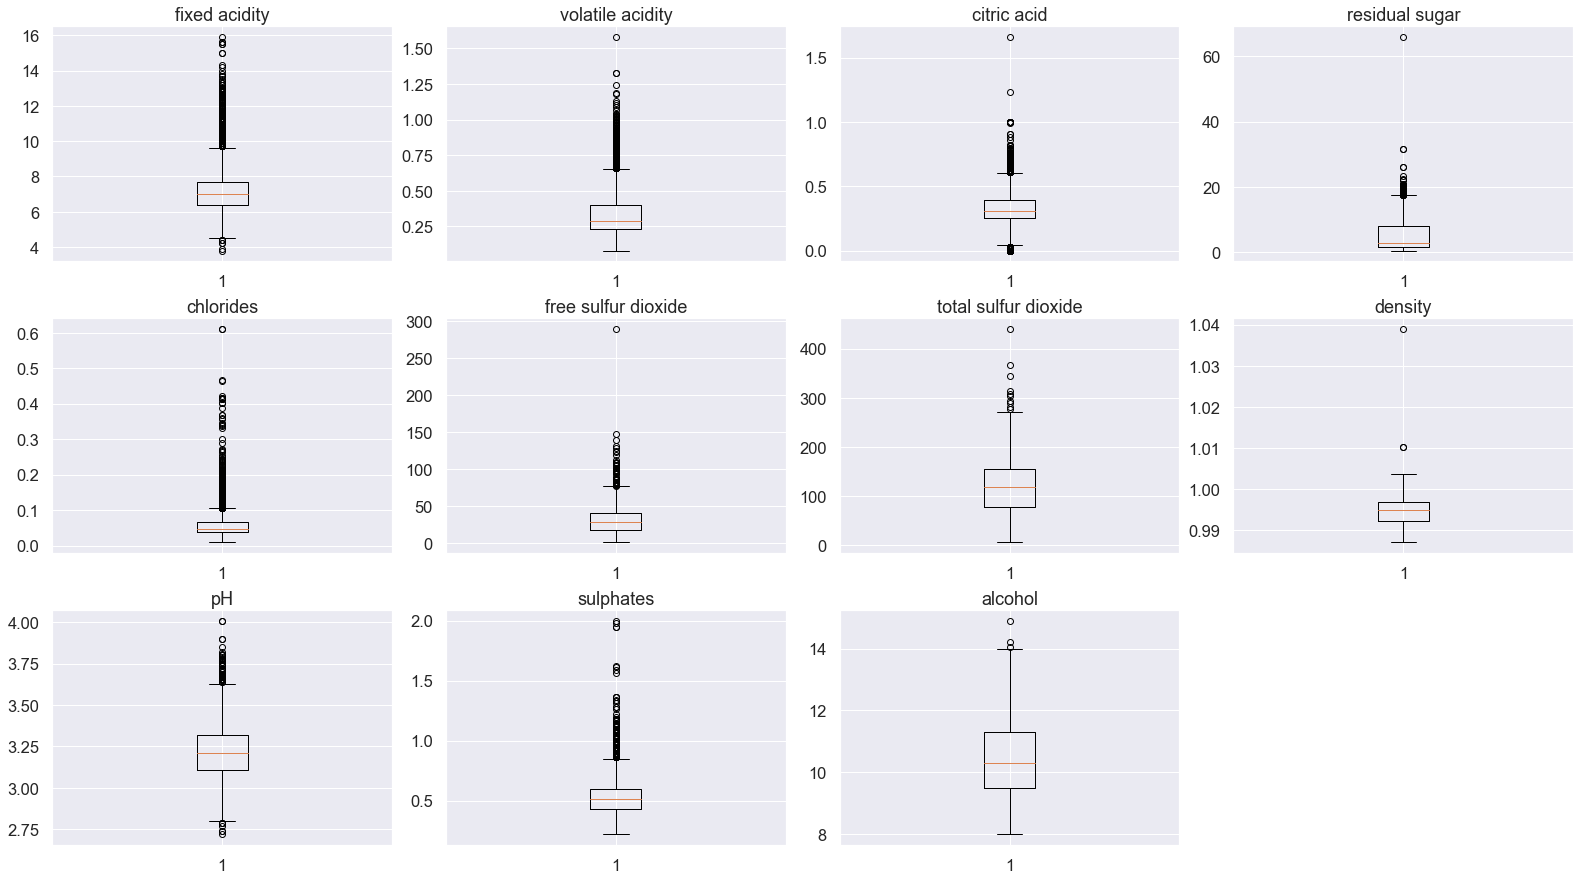

In [80]:
outliers_by_12_variables = ['fixed acidity', 'volatile acidity', 'citric acid',
                            'residual sugar', 'chlorides', 'free sulfur dioxide',
                            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.tight_layout(pad=0.5)
    plt.boxplot(df_mean[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

### Logistic Regression Theory

- <b> What is Logistic Regression? </b> <br>
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. <br> 
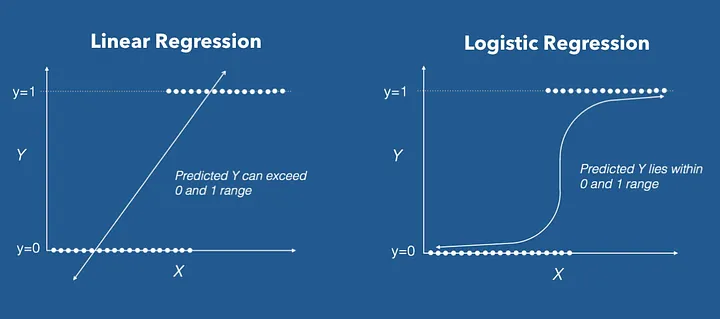 <br>

- <b>What is the Sigmoid Function?</b>
In order to map predicted values to probabilities, we use the Sigmoid function.<br>
The function maps any real value into another value between 0 and 1.<br>
In machine learning, we use sigmoid to map predictions to probabilities.<br>
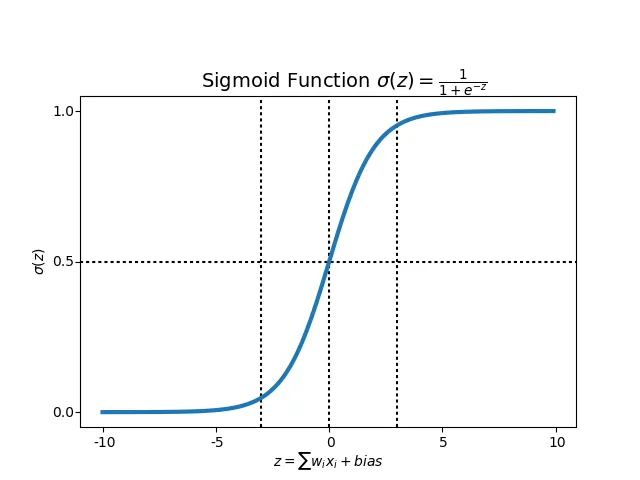 <br>
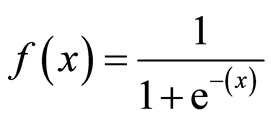 <br>

Reference: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148 <br>




- <b> Logistic Regression Evaluation Metrics </b><br><br>
Logistic regression is a classification algorithm used for binary and multiclass classification problems. There are several evaluation metrics that can be used to evaluate the performance of a logistic regression model, including: <br>
<b>Confusion Matrix: </b> A confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model. <br>
<b>F1 Score:</b>The F1 score is the harmonic mean of precision and recall. It is a single metric that balances both precision and recall, and is useful when the goal is to achieve a balance between these two metrics. <br>
<b>ROC Curve:</b> The ROC curve (Receiver Operating Characteristic curve) is a graphical representation of the performance of a binary classifier. <br> It plots the true positive rate against the false positive rate at different classification thresholds. <br> The ROC curve can be used to choose the best threshold for a binary classifier and to compare the performance of different models. <br>
<b>AUC (Area Under the Curve):</b> The AUC (Area Under the Curve) is the area under the ROC curve.<br> It is a single metric that summarizes the performance of a binary classifier.<br> AUC ranges between 0 and 1, with a value of 1 indicating perfect classification and a value of 0.5 indicating random classification.<br>




### Implementation

#### Mapping Red and White wine to 0s and 1s

In [83]:
df_mean.type = df_mean.type.map({'red':0, 'white':1})

#### Creating Training and Testing Groups

In [89]:
X = df_mean[['type', 'alcohol', 'density', 'volatile acidity', 'chlorides',
       'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'residual sugar', 'pH']]
y = df_mean['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)


#### Setting and Fitting the model

In [90]:
log = LogisticRegression(random_state=40)
log.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [91]:
train_accuracy = log.score(X_train, y_train)
test_accuracy = log.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.73
Accuracy in Test  Group   : 0.73


<AxesSubplot: >

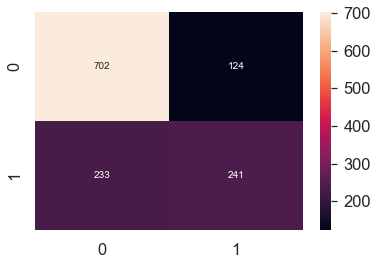

In [99]:
pred = log.predict(X_test)
score = round(accuracy_score(y_test,pred),3)
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")